In [6]:
## 참조 사이트 : https://hyongdoc.tistory.com/404

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [45]:
audio_path = 'data/emotion_dataset/4th_year/5e2ac6f85807b852d9e01ffe.wav'
y, sr = librosa.load(audio_path)

<h3> Short Time Fourier Transform </h3>

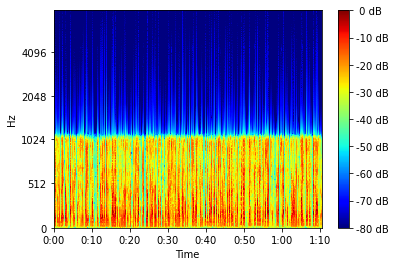

In [10]:
frame_length = 0.025
frame_stride = 0.01
sr = 16000

n_fft_25 = int(round(sr * frame_length))
hop_length_10 = int(round(sr * frame_stride))

stft_res = librosa.stft(y, n_fft=n_fft_25, win_length=n_fft_25, hop_length=hop_length_10)
D = np.abs(stft_res)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = hop_length_10, y_axis='mel', x_axis='time', cmap = cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()

<h3>Mel-filterbank</h3><br>
STFT의 결과인 스펙트로그램에 Mel filter bank를 적용하면 멜 스펙트로그램이 된다. <br>
librosa에서는 librosa.filters.mel을 통해 mel filter bank를 생성할 수 있게 하지만, feature.melspectrogram로 멜스펙트로그램을 직접 생성할 수 있기 때문에 스펙트로그램에 적용해보기는 어렵다.

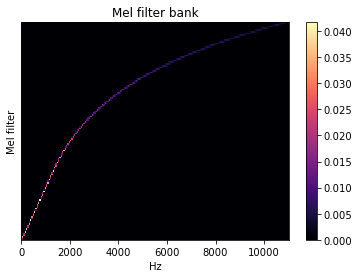

In [32]:
# https://librosa.org/doc/main/generated/librosa.filters.mel.html
## n_mels : mel band의 개수, 많을수록 주파수가 촘촘하게 나뉘어진다.
mfb = librosa.filters.mel(sr, n_fft = n_fft_25, n_mels = 128)
 
# mel filter bank 출력
fig, ax = plt.subplots()
img = librosa.display.specshow(mfb, x_axis='linear', ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img, ax=ax)
plt.savefig('mel filter bank')

<h3> Mel Spectrogram </h3>

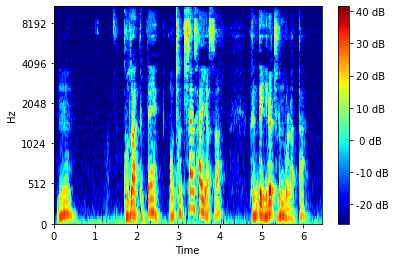

In [46]:
# stft documnets : https://librosa.org/doc/0.8.0/generated/librosa.stft.html
# mel spectrogram 자료 : https://hyongdoc.tistory.com/402
n_fft = n_fft_25 * 2
win_length = n_fft_25
hop_length = hop_length_10
n_mels = 128

D = np.abs(librosa.stft(y, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
mel_spec = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)
librosa.display.specshow(librosa.amplitude_to_db(mel_spec, ref=0.0002), sr=sr, hop_length=hop_length, y_axis='mel', x_axis='time', cmap=cm.jet)
plt.colorbar(format='%2.0f dB')
plt.savefig('5e2ac6f85807b852d9e01ffe_mel')
plt.show()

<h3> Mel Frequency Cepstral Coeficient </h3>

[Text(0.5, 1.0, 'MFCC')]

<Figure size 720x288 with 0 Axes>

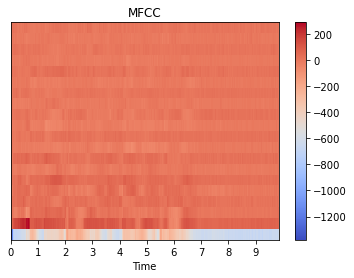

In [42]:
# 참조 사이트 : https://hyongdoc.tistory.com/403

n_fft = n_fft_25 * 2
win_length = n_fft_25
hop_length = hop_length_10
n_mels = 128 # default
n_mfcc = 20 # default

# mfcc에는 멜 스펙트로그램의 log값이 필요하다. 
## 원래는 logamplitude 함수로 변환하였으나, power를 db로 변환하는 과정 자체가 로그함수를 씌우는 것이기 때문에 power_to_db로 함수가 대체됨

D = np.abs(librosa.stft(y, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
MS = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(D), sr=sr, n_mfcc=n_mfcc)

plt.figure(figsize=(10, 4))
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
#plt.savefig('mfcc')